In [92]:
import numpy as np
import pandas as pd 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [93]:
data = pd.read_csv('age_salary.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [94]:
#data.Gender = data.Gender.apply(list(data.Gender.unique()).index)
data = data.drop(['User ID','Gender'], axis=1)
y = data.Purchased.values

X = data.drop(['Purchased'], axis=1).values


In [95]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
ss = StandardScaler()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)


In [97]:
clf = SVC(kernel = 'linear', random_state = 0)

In [98]:
clf.fit(Xtrain,ytrain)

SVC(kernel='linear', random_state=0)

In [99]:
xx = np.arange(Xtest[:,0].min(),Xtest[:,0].max(),step=0.005)
yy = np.arange(Xtest[:,1].min(),Xtest[:,1].max(),step=0.005)
Xax,Yax = np.meshgrid(xx,yy)
ax = np.array([Xax.ravel(),Yax.ravel()]).T


In [100]:
z = clf.predict(ax).reshape(Xax.shape)

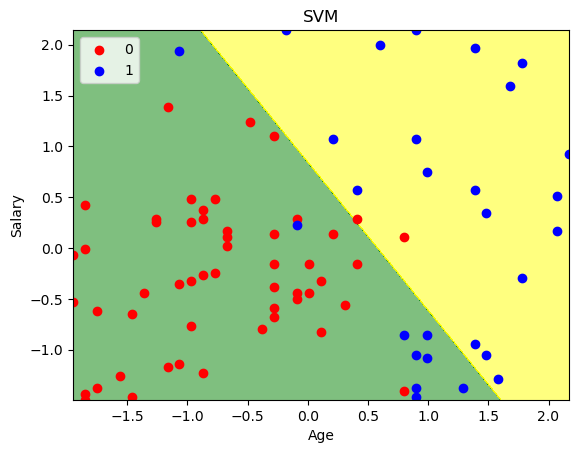

In [101]:
plt.contourf(Xax,Yax,z, alpha=0.5, cmap = ListedColormap(('green', 'yellow')))
plt.scatter( Xtest [ytest == 0, 0], Xtest [ytest == 0, 1], c = 'r', label=0 )
plt.scatter( Xtest [ytest == 1, 0], Xtest [ytest == 1, 1], c = 'b', label=1 )


plt.xlim(Xax.min(), Xax.max())
plt.ylim(Yax.min(), Yax.max())

plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='best');